In [77]:
import pandas as pd
import numpy as np

In [78]:

headers=['youtube_id','timestamp','class_id','class_name','object_id','object_presense',
        'xmin','xmax','ymin','ymax']

In [79]:
df = pd.read_csv('youtubebb/youtube_boundingboxes_detection_validation.csv',names=headers)

In [80]:
df = df[df['class_name'] == 'car']

In [81]:
df[0:10]

,youtube_id,timestamp,class_id,class_name,object_id,object_presense,xmin,xmax,ymin,ymax
38,AAQmL_BlrRs,0,23,car,0,present,0.041,1.000,0.161667,0.861667
39,AAQmL_BlrRs,1000,23,car,0,present,0.039,1.000,0.175000,0.878333
40,AAQmL_BlrRs,2000,23,car,0,present,0.029,1.000,0.153333,0.850000
41,AAQmL_BlrRs,3000,23,car,0,present,0.059,1.000,0.108333,0.830000
42,AAQmL_BlrRs,4000,23,car,0,present,0.000,0.948,0.190000,0.865000
43,AAQmL_BlrRs,5000,23,car,0,present,0.020,0.990,0.200000,0.863333
44,AAQmL_BlrRs,6000,23,car,0,present,0.016,0.990,0.170000,0.848333
45,AAQmL_BlrRs,7000,23,car,0,present,0.000,0.883,0.010000,0.726667
46,AAQmL_BlrRs,8000,23,car,0,present,0.001,0.808,0.000000,0.751667
47,AAQmL_BlrRs,9000,23,car,0,present,0.000,1.000,0.011667,0.908333


In [86]:
grouped = df.groupby('youtube_id')
print(len(grouped))
# Only get videos that have object are bigger than 30% of t he frame
def filter_obj(group, threshold=0.3):
    area = (group['xmax'] - group['xmin'])*(group['ymax'] - group['ymin']) < 0.01
    is_good = area.any()
    return is_good

grouped = grouped.filter(lambda x: filter_obj(x)).groupby('youtube_id')
print(len(grouped))

959
324


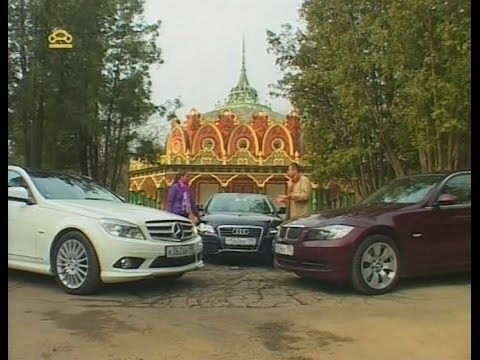

In [87]:
from IPython.display import YouTubeVideo

idx = 62
YouTubeVideo(grouped.groups.keys()[idx])

In [89]:
# Good id jDGrgBt83DU

jDGrgBt83DU
